# Frozen Lake Experiment
### Import dependencies

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map

import time, sys

## Run Episodes

In [3]:
def run_episodes(environment, policy, gamma):
    state = environment.reset()[0]
    total_reward = 0
    step = 0
    win = 0
    done = False
    while not done:
        state, reward, done, _, __ = env.step(int(policy[state]))
        total_reward += (gamma ** step * reward)
        step += 1
        if done and reward == 1.0:
            win += 1
            break
    return total_reward, win

## Policy Iteration

In [4]:
def policy_iteration(environment, gamma, max_iters = 200000):
    policy = np.random.choice(environment.action_space.n, size = environment.observation_space.n)
    desc = environment.unwrapped.desc
    for i in range(max_iters):
        old_policy_val_func = compute_value_function(environment, policy, gamma)
        new_policy = policy_extraction(environment, old_policy_val_func, gamma)
        if np.all(policy == new_policy):
            k = i + 1
            break
        policy = new_policy
    return policy, k

## Policy Evaluation

In [5]:
def policy_evaluation(environment, policy, gamma, n = 100):
    wins = 0
    scores = []
    for i in range(n):
            score, win = run_episodes(environment, policy, gamma)
            scores.append(score)
            wins += win
    scores = [run_episodes(environment, policy, gamma) for _ in range(n)]
    return np.mean(scores), wins

## Policy Extraction

In [6]:
def policy_extraction(environment, v, gamma):
    policy = np.zeros(environment.observation_space.n)
    for state in range(environment.observation_space.n):
        q_sa = np.zeros(environment.action_space.n)
        for action in range(environment.action_space.n):
            q_sa[action] = sum([p * (r + gamma * v[state_]) for p, state_, r, _ in environment.P[state][action]])
        policy[state] = np.argmax(q_sa)
    return policy

## Compute Value Function

In [7]:
def compute_value_function(environment, policy, gamma):
    V = np.zeros(environment.observation_space.n)
    epsilon = 1e-05
    
    while True:
        prev_v = np.copy(V)
        for state in range(environment.observation_space.n):
            policy_action = policy[state]
            V[state] = sum([p * (r + gamma * prev_v[state_]) for p, state_, r, is_done, in environment.P[state][policy_action]])
        delta = np.sum(np.fabs(prev_v-V))
        if delta <= epsilon:
            break
    return V

## Value Iteration

In [8]:
def value_iteration(environment, gamma, max_iters=100000):
    V = np.zeros(environment.observation_space.n)
    epsilon = 1e-20
#     desc = environment.unwrapped.desc
    for i in range(max_iters):
        prev_v = np.copy(V)
        for state in range(environment.observation_space.n):
            q_sa = [sum([p*(r + gamma*prev_v[state_]) for p, state_, r, _ in env.P[state][action]]) for action in range(environment.action_space.n)]
            V[state] = max(q_sa)
        delta = np.sum(np.fabs(prev_v-V))
        if delta <= epsilon:
            k = i + 1
            break
    return V, k

## Initialize Environment

In [59]:
env = gym.make('FrozenLake-v1', desc=generate_random_map(size=8))
env = env.unwrapped
desc = env.unwrapped.desc

time_arr = [0] * 10
gamma_arr = [0] * 10
its = [0] * 10
scores_list = [0] * 10

## Policy Iteration Analysis

In [60]:
n_episodes = 30000
for i in range(0,10):
    start = time.time()
    gamma = (i + 0.5) / 10
    
    best_policy, k = policy_iteration(env, gamma)
    policy_score, wins = policy_evaluation(env, best_policy, gamma, n=n_episodes)
    end = time.time()
    gamma_arr[i] = gamma
    scores_list[i] = policy_score
    its[i] = k
    time_arr[i] = end - start
    
    print(f'Summary (gamma = {gamma}):')
    print(f'Total wins over {n_episodes} episodes: {wins}')
    print(f'Average reward over {n_episodes} episodes: {policy_score}')
    print('-----------------------------------------------------------------------')

Summary (gamma = 0.05):
Total wins over 30000 episodes: 0
Average reward over 30000 episodes: 0.0
-----------------------------------------------------------------------
Summary (gamma = 0.15):
Total wins over 30000 episodes: 0
Average reward over 30000 episodes: 0.0
-----------------------------------------------------------------------
Summary (gamma = 0.25):
Total wins over 30000 episodes: 0
Average reward over 30000 episodes: 0.0
-----------------------------------------------------------------------
Summary (gamma = 0.35):
Total wins over 30000 episodes: 0
Average reward over 30000 episodes: 0.0
-----------------------------------------------------------------------


KeyboardInterrupt: 

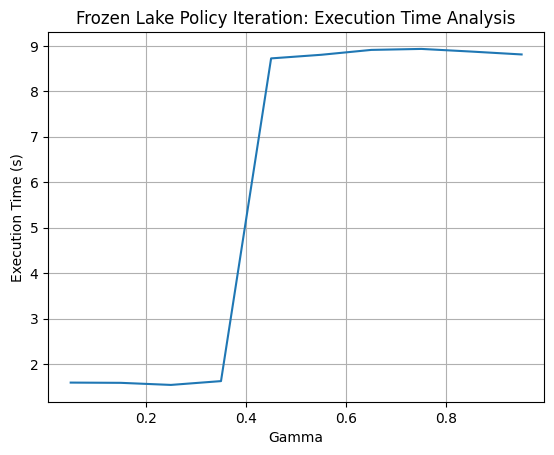

In [47]:
plt.plot(gamma_arr, time_arr)
plt.xlabel('Gamma')
plt.ylabel('Execution Time (s)')
plt.title('Frozen Lake Policy Iteration: Execution Time Analysis')
plt.grid()
plt.savefig('FLPI time analysis ' + str(n_episodes) + 'ep.png')

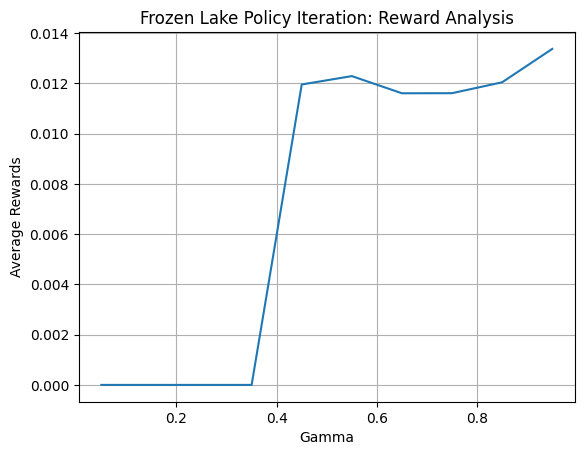

In [48]:
plt.plot(gamma_arr, scores_list)
plt.xlabel('Gamma')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake Policy Iteration: Reward Analysis')
plt.grid()
plt.savefig('FLPI reward analysis ' + str(n_episodes) + 'ep.png')

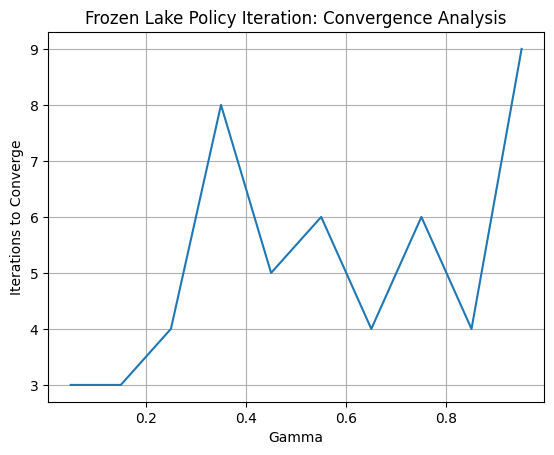

In [49]:
plt.plot(gamma_arr, its)
plt.xlabel('Gamma')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake Policy Iteration: Convergence Analysis')
plt.grid()
plt.savefig('FLPI convergence analysis ' + str(n_episodes) + 'ep.png')

## Value Iteration Analysis

In [50]:
best_vals = [0] * 10
n_episodes = 30000
for i in range(0,10):
    start = time.time()
    gamma = (i + 0.5) / 10
    best_value, k = value_iteration(env, gamma)
    policy = policy_extraction(env, best_value, gamma)
    policy_score, wins = policy_evaluation(env, policy, gamma, n=n_episodes)
    end = time.time()
    gamma_arr[i] = gamma
    its[i] = k
    best_vals[i] = best_value
    scores_list[i] = policy_score
    time_arr[i] = end-start
    
    print(f'Summary (gamma = {gamma}):')
    print(f'Total wins over {n_episodes} episodes: {wins}')
    print(f'Average reward over {n_episodes} episodes: {policy_score}')
    print('-----------------------------------------------------------------------')

Summary (gamma = 0.05):
Total wins over 30000 episodes: 706
Average reward over 30000 episodes: 0.012316666666666667
-----------------------------------------------------------------------
Summary (gamma = 0.15):
Total wins over 30000 episodes: 725
Average reward over 30000 episodes: 0.01180000000000001
-----------------------------------------------------------------------
Summary (gamma = 0.25):
Total wins over 30000 episodes: 665
Average reward over 30000 episodes: 0.012883333333371695
-----------------------------------------------------------------------
Summary (gamma = 0.35):
Total wins over 30000 episodes: 713
Average reward over 30000 episodes: 0.011816666671052552
-----------------------------------------------------------------------
Summary (gamma = 0.45):
Total wins over 30000 episodes: 745
Average reward over 30000 episodes: 0.012183334299810167
-----------------------------------------------------------------------
Summary (gamma = 0.55):
Total wins over 30000 episodes: 

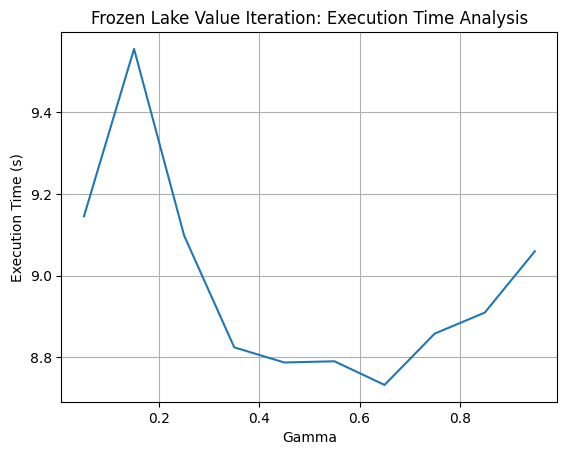

In [51]:
plt.plot(gamma_arr, time_arr)
plt.xlabel('Gamma')
plt.ylabel('Execution Time (s)')
plt.title('Frozen Lake Value Iteration: Execution Time Analysis')
plt.grid()
plt.savefig('FLVI time analysis ' + str(n_episodes) + 'ep.png')

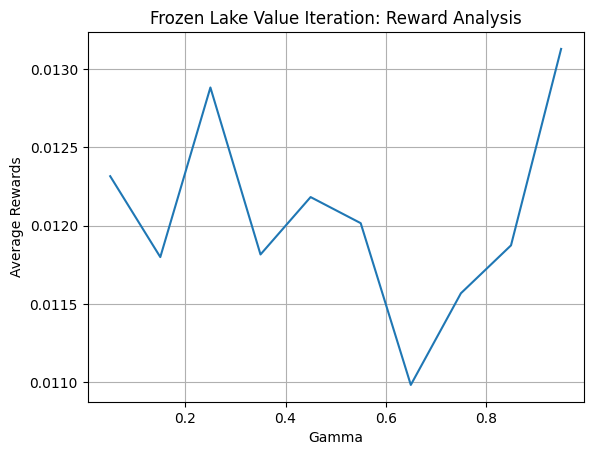

In [52]:
plt.plot(gamma_arr, scores_list)
plt.xlabel('Gamma')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake Value Iteration: Reward Analysis')
plt.grid()
plt.savefig('FLVI reward analysis ' + str(n_episodes) + 'ep.png')

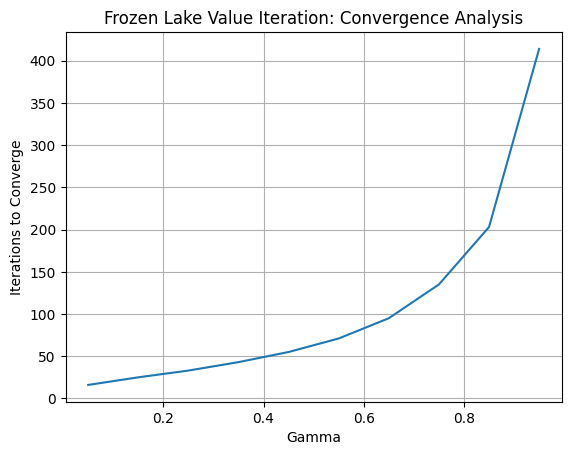

In [53]:
plt.plot(gamma_arr, its)
plt.xlabel('Gamma')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake Value Iteration: Convergence Analysis')
plt.grid()
plt.savefig('FLVI convergence analysis ' + str(n_episodes) + 'ep.png')

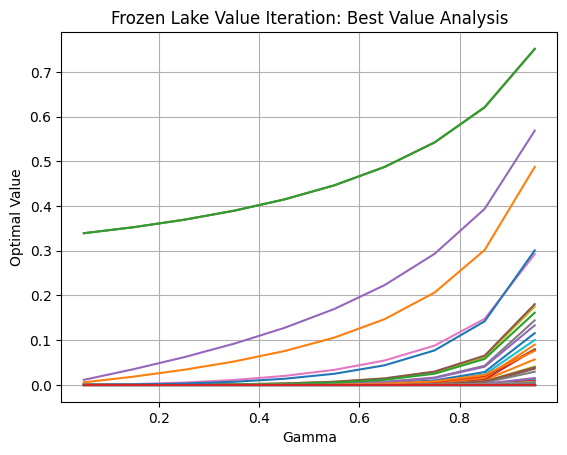

In [54]:
plt.plot(gamma_arr, best_vals)
plt.xlabel('Gamma')
plt.ylabel('Optimal Value')
plt.title('Frozen Lake Value Iteration: Best Value Analysis')
plt.grid()
plt.savefig('FLVI best value analysis ' + str(n_episodes) + 'ep.png')

## Q-Learning Analysis

In [55]:
start = time.time()
reward_arr = []
its_arr = []
size_arr = []
chunks_arr = []
avgs_arr = []
time_arr = []
Q_arr = []
for i in range(0,10):
    epsilon = (i + 0.5) / 10
    print(f'Summary (ε={epsilon}): ')
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    iters = []
    optimal = [0]*env.observation_space.n
    alpha = 0.85
    gamma = 0.95
    n_episodes = 30000
    win = 0
    env = gym.make('FrozenLake-v1')
    env = env.unwrapped
    desc = env.unwrapped.desc
    for episode in range(n_episodes):
        state = env.reset()[0]
        done = False
        t_reward = 0
        max_steps = 1000000
        for j in range(max_steps):
            if done:
                break
            current = state
            if np.random.rand() < epsilon:
                action = np.argmax(Q[current, :])
            else:
                action = env.action_space.sample()
            
            state, reward, done, info, _ = env.step(action)
            if reward == 1.0:
                win += 1
            t_reward += reward
            Q[current, action] += alpha * (reward + gamma * np.max(Q[state, :]) - Q[current, action])
        epsilon = (1-2.71**(-episode/1000))
        rewards.append(t_reward)
        iters.append(i)
    for state in range(env.observation_space.n):
        optimal[state] = np.argmax(Q[state, :])
    
    reward_arr.append(rewards)
    its_arr.append(iters)
    Q_arr.append(Q)
    
    env.close()
    end = time.time()
    time_arr.append(end-start)
    
    def chunk_list(rewards, size):
        for i in range(0, len(rewards), size):
            yield rewards[i:i+size]
    
    size = int(n_episodes / 50)
    chunks = list(chunk_list(rewards, size))
    avgs = [sum(chunk) / len(chunk) for chunk in chunks]
    size_arr.append(size)
    chunks_arr.append(chunks)
    avgs_arr.append(avgs)
    
    print(f'Average reward of {n_episodes} episodes: {np.mean(rewards)}')
    print(f'Wins over {n_episodes} episodes: {win}')
    print('-----------------------------------------------------------------------')

Summary (ε=0.05): 
Average reward of 30000 episodes: 0.7116
Wins over 30000 episodes: 21348
-----------------------------------------------------------------------
Summary (ε=0.15): 
Average reward of 30000 episodes: 0.7056
Wins over 30000 episodes: 21168
-----------------------------------------------------------------------
Summary (ε=0.25): 
Average reward of 30000 episodes: 0.6814
Wins over 30000 episodes: 20442
-----------------------------------------------------------------------
Summary (ε=0.35): 
Average reward of 30000 episodes: 0.7096666666666667
Wins over 30000 episodes: 21290
-----------------------------------------------------------------------
Summary (ε=0.45): 
Average reward of 30000 episodes: 0.6823666666666667
Wins over 30000 episodes: 20471
-----------------------------------------------------------------------
Summary (ε=0.55): 
Average reward of 30000 episodes: 0.7053
Wins over 30000 episodes: 21159
----------------------------------------------------------------

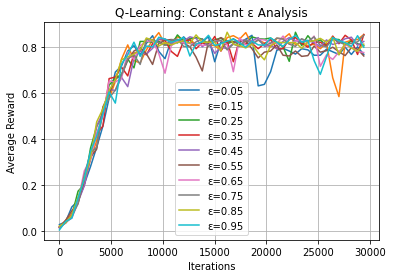

In [136]:
for i in range(0, 10):
    epsilon = (i + 0.5) / 10
    plt.plot(range(0, len(reward_arr[i]), size_arr[i]), avgs_arr[i], label='ε=' + str(epsilon))

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title('Frozen Lake Q-Learning: Constant ε Analysis')
plt.grid()
plt.savefig('FLQL constant eps.png')

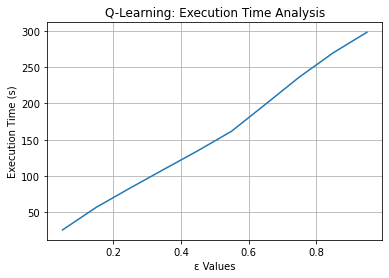

In [137]:
epsilons = []
for i in range(0,10):
    epsilons.append((i + 0.5) / 10)
plt.plot(epsilons, time_arr)
plt.xlabel('ε Values')
plt.ylabel('Execution Time (s)')
plt.title('Frozen Lake Q-Learning: Execution Time Analysis')
plt.grid()
plt.savefig('FLQ time analysis.png')

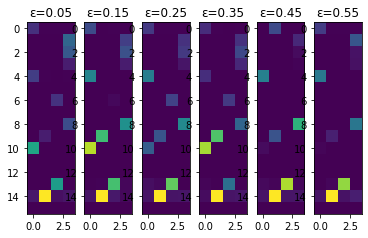

In [153]:
plt.subplot(1,10,1)
plt.imshow(Q_arr[0])
plt.title('ε=0.05')

plt.subplot(1,10,2)
plt.title('ε=0.15')
plt.imshow(Q_arr[1])

plt.subplot(1,10,3)
plt.title('ε=0.25')
plt.imshow(Q_arr[2])

plt.subplot(1,10,4)
plt.title('ε=0.35')
plt.imshow(Q_arr[3])

plt.subplot(1,10,5)
plt.title('ε=0.45')
plt.imshow(Q_arr[4])

plt.subplot(1,10,6)
plt.title('ε=0.55')
plt.imshow(Q_arr[5])

plt.subplot(1,10,7)
plt.imshow(Q_arr[6])
plt.title('ε=0.65')

plt.subplot(1,10,8)
plt.title('ε=0.75')
plt.imshow(Q_arr[7])

plt.subplot(1,10,9)
plt.title('ε=0.85')
plt.imshow(Q_arr[8])

plt.subplot(1,10,10)
plt.title('ε=0.95')
plt.imshow(Q_arr[9])
plt.colorbar()

plt.savefig('fl ql.png')

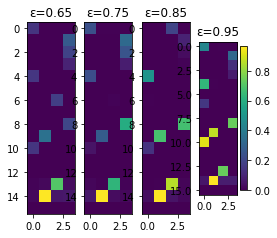

In [154]:
plt.subplot(1,6,1)
plt.imshow(Q_arr[6])
plt.title('ε=0.65')

plt.subplot(1,6,2)
plt.title('ε=0.75')
plt.imshow(Q_arr[7])

plt.subplot(1,6,3)
plt.title('ε=0.85')
plt.imshow(Q_arr[8])

plt.subplot(1,6,4)
plt.title('ε=0.95')
plt.imshow(Q_arr[9])
plt.colorbar()
plt.savefig('fl ql2.png')